In [1]:
import math
import pandas as pd
from langdetect import detect
import numpy as np
import nltk
from nltk.stem import WordNetLemmatizer
import string
from sklearn.feature_extraction.text import CountVectorizer
import math
import matplotlib.pyplot as plt

In [2]:
lem = WordNetLemmatizer() #create lemmatizer

In [3]:
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kseniapavlina/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
dictionary = pd.read_csv('../data/processedDict.csv')
dictionary['word'] = dictionary['word'].apply(lambda x: lem.lemmatize(x, pos='n'))

In [5]:
dictionary

,word,cat_lev1,cat_lev2,cat_lev3,ndf
0,information,business,professional_conduct_host,advice,0.008904
1,recommendation,business,professional_conduct_host,advice,0.008375
2,tip,business,professional_conduct_host,advice,0.008399
3,advice,business,professional_conduct_host,advice,0.007568
4,suggestion,business,professional_conduct_host,advice,0.007580
...,...,...,...,...,...
347,talking,social,social_interaction,talking,0.001961
348,chatting,social,social_interaction,talking,0.001408
349,moment,social,social_interaction,talking,0.001155
350,chat,social,social_interaction,talking,0.000553


In [6]:
filepath = '../data/en_reviews/Manchester.csv'
reviews = pd.read_csv(filepath)

# reviews = reviews['date']
reviews

table = str.maketrans('', '', string.punctuation) #mapping to strip punctuation in review

#strip punct of each review -> lemmatise -> output is list of words so join into sentences
reviews['comments'] = reviews.comments.apply(lambda review: ' '.join(map(str, [lem.lemmatize(word.translate(table), pos='n') for word in review.lower().split()])))
reviews

reviews['date'] = pd.to_datetime(reviews['date'])

In [19]:
#### DELETE THIS LATER ###
mask = (reviews['date'] >= '2014-01-01') & (reviews['date'] < '2018-01-01')
reviews = reviews.loc[mask].copy()
reviews

,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments,langs,den,temp,business,professional_conduct_host,location,property
14,14,68951,10229418,2014-02-08,10652136,Justine,it a lovely house and awesome person you could...,en,9.416378,0.693147,7.361080,0.000000,0.000000,7.361080
15,15,68951,11050942,2014-03-18,9852319,Greg,all very nice clean and easy to check in and o...,en,17.734145,2.079442,11.725638,3.908546,3.908546,3.908546
16,16,68951,14658065,2014-06-23,10195882,Emma,we had a wonderful stay in peter and dellas lo...,en,40.827819,9.010913,22.070523,1.697733,16.977326,3.395465
17,17,68951,15670815,2014-07-14,13078630,David,we had the best experience in this house durin...,en,102.038993,22.703958,22.250276,2.037889,11.945401,8.266986
18,18,68951,17303401,2014-08-10,1669938,Libby,great accommodation warm welcome with a fridge...,en,22.403853,6.931472,30.938748,9.281625,6.187750,15.469374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86047,93324,22998816,120062317,2016-12-07,1584560,Phil,a whole flat for the price of a hotel room rea...,en,12.594432,3.465736,27.518000,0.000000,11.007200,16.510800
86048,93325,22998816,126358145,2017-01-11,30793292,David,i would recommend the heart for anyone working...,en,24.601078,11.090355,45.080768,0.000000,33.810576,11.270192
86049,93326,22998816,151327457,2017-05-12,127705440,Liam,ideal for what we needed 1 night close to old...,en,19.120439,1.386294,7.250327,0.000000,7.250327,0.000000
86050,93327,22998816,155425156,2017-05-28,33018033,Catherine,we stayed for one night at this location and f...,en,15.367021,2.079442,13.531846,0.000000,9.021230,4.510615


In [8]:
reviews

,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments,langs
14,14,68951,10229418,2014-02-08,10652136,Justine,it a lovely house and awesome person you could...,en
15,15,68951,11050942,2014-03-18,9852319,Greg,all very nice clean and easy to check in and o...,en
16,16,68951,14658065,2014-06-23,10195882,Emma,we had a wonderful stay in peter and dellas lo...,en
17,17,68951,15670815,2014-07-14,13078630,David,we had the best experience in this house durin...,en
18,18,68951,17303401,2014-08-10,1669938,Libby,great accommodation warm welcome with a fridge...,en
...,...,...,...,...,...,...,...,...
132232,143614,40944487,583880389,2019-12-29,317007245,Naoki,nice placeclean and tidy close to tram station...,en
132250,143634,40958538,581907582,2019-12-26,284016202,Fisher,pretty nice propertyit provided u a very good ...,en
132251,143635,40958538,583319985,2019-12-28,250172768,Joel,our entire experience with this stay wa unprof...,en
132253,143637,40996300,583843314,2019-12-29,86304424,Rafael,nice owner nice location good value,en


In [23]:
def get_trends_nice(category, subcats):
    years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
    allwords = reviews['comments'].tolist()
    allwords = " ".join(allwords)
    unique_words = set(allwords.split(' '))
    len(unique_words)

    unique_words = list(unique_words)
    unique_words = [string for string in unique_words if string != ""]
#     len(unique_words)

    ls = []
    for word in unique_words:
        word = ''.join([i for i in word if not i.isdigit()])
        ls += [word]
    unique_words= ls
    unique_words = [string for string in unique_words if string != ""]
    unique_words = list(dict.fromkeys(unique_words))

    def countWords(word, review):
        count = 0
        for i in review:
            if i == word:
                count+=1
        return count

    def getDenom(review, unique_words):
        count = 0
        den = 0
        ls = []
        review = review.split()
        for word in review:
            kmp = countWords(word, review)
            if (kmp > 0 and word not in ls):
                ls += [word]
                den += math.log(1 + kmp)
        return den

    reviews['den'] = reviews['comments'].apply(lambda x: getDenom(x, unique_words))

    def getNom(category, review, dictionary, cat_levl="cat_lev1"):
        nom = 0
        review = review.split()
        dictionaryWords = dictionary[(dictionary[cat_levl] == category)]
        dictionaryWords = dictionaryWords['word']
        for word in dictionaryWords:
            nom += math.log(1 + review.count(word))
        return nom

    reviews['temp'] = reviews['comments'].apply(lambda x: getNom(category, x, dictionary))
    reviews[category] = reviews['temp']*100/reviews['den']

    k = {}
    for subcat in subcats:
        temp = reviews['comments'].apply(lambda x: getNom(subcat, x, dictionary, cat_levl="cat_lev2"))
        reviews[subcat] = temp * 100 / reviews["den"]
        k[subcat] = reviews[subcat].loc[reviews[subcat] > 0].min()
        
    print(k)
    
    k_business= reviews[category].loc[reviews[category] > 0]
    k_business = k_business.min()
    print(k_business)

    def adoptionForSetOfReviews(category, setOfReviews, dictionary, startDate, endDate, k):
        adoption = 1
        mask = (setOfReviews['date'] >= startDate) & (setOfReviews['date'] < endDate)
        setOfReviews = setOfReviews.loc[mask]
        setOfReviews = setOfReviews[category]
        if (len(setOfReviews) == 0):
            return 0
        else:
            b = 1/len(setOfReviews)
            for review in setOfReviews:
                adoption *= math.pow((review + k),b)
            adoption = adoption - k
            return adoption

    d2 = {'year' : years, 'value':0.0}
    out = pd.DataFrame(data=d2)
    
    for i in range(len(years)):
        out.at[i, "value_{}".format(category)] = adoptionForSetOfReviews(category, reviews, dictionary, "{}-01-01".format(years[i]), "{}-01-01".format(years[i] + 1), k_business)
        for subcat in subcats:
            out.at[i, "value_{}_{}".format(category, subcat)] = adoptionForSetOfReviews(subcat, reviews, dictionary, "{}-01-01".format(years[i]), "{}-01-01".format(years[i] + 1), k[subcat])

    return out

In [29]:
subcats = ["meal", "people", "personality_host", "talking", "sharing"]
soci = get_trends_nice("social", subcats)

{'meal': 0.26103746495305624, 'people': 0.2838709557660387, 'personality_host': 0.23074648557208602, 'talking': 0.23074648557208602, 'sharing': 0.23074648557208602}


In [30]:
a = pd.DataFrame(columns=["year", "subcat", "val"])

for subcat in subcats:
    ap = {"year": soci["year"], "val": soci["value_social_{}".format(subcat)]}
    ap = pd.DataFrame(data=ap)
    ap["subcat"] = subcat
    a = a.append(ap)
a

,subcat,val,year
0,meal,0.000000,2010
1,meal,0.000000,2011
2,meal,0.000000,2012
3,meal,0.000000,2013
4,meal,0.137738,2014
5,meal,0.102593,2015
6,meal,0.074090,2016
7,meal,0.047448,2017
8,meal,0.041704,2018
9,meal,0.033266,2019


In [31]:
pivot_social = a.pivot(index='year', columns='subcat', values='val')
pivot_social

subcat,meal,people,personality_host,sharing,talking
year,,,,,
2010,0.000000,0.000000,0.000000,0.000000,0.000000
2011,0.000000,0.000000,0.000000,0.000000,0.000000
2012,0.000000,0.000000,0.000000,0.000000,0.000000
2013,0.000000,0.000000,0.000000,0.000000,0.000000
2014,0.137738,0.787639,0.377458,0.065858,0.041008
2015,0.102593,0.660845,0.331879,0.069812,0.034708
2016,0.074090,0.481384,0.263351,0.048742,0.026996
2017,0.047448,0.286625,0.201568,0.027310,0.012982
2018,0.041704,0.238663,0.167346,0.023386,0.011017


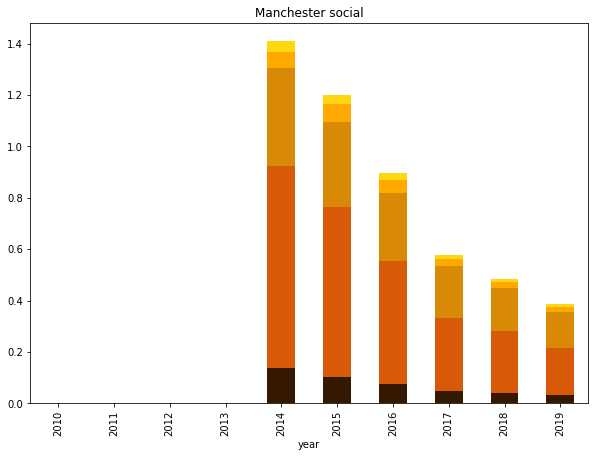

In [32]:
ax = pivot_social.loc[:,['meal','people', 'personality_host', 'sharing', 'talking']].plot.bar(stacked=True, figsize=(10,7), color=['#351800','#D85907','#D88A07','#FFA900','#FFD70F'])
plt.title("Manchester social")
ax.get_legend().remove()

In [33]:
subcats = ["advice", "personality_host2", "logistic", "location", 
           "property_type", "facilities", "interiors", "communication"]
busi = get_trends_nice("business", subcats)

{'advice': 0.21719385291080573, 'personality_host2': 0.21719385291080573, 'logistic': 0.23287170822818326, 'location': 0.4805193327389338, 'property_type': 0.2563181226180372, 'facilities': 0.2563181226180372, 'interiors': 0.36420561789903516, 'communication': 0.27857171233907196}


In [34]:
a = pd.DataFrame(columns=["year", "subcat", "val"])

for subcat in subcats:
    ap = {"year": busi["year"], "val": busi["value_business_{}".format(subcat)]}
    ap = pd.DataFrame(data=ap)
    ap["subcat"] = subcat
    a = a.append(ap)
a

,subcat,val,year
0,advice,0.000000,2010
1,advice,0.000000,2011
2,advice,0.000000,2012
3,advice,0.000000,2013
4,advice,0.078881,2014
...,...,...,...
5,communication,0.117358,2015
6,communication,0.144310,2016
7,communication,0.168619,2017
8,communication,0.193228,2018


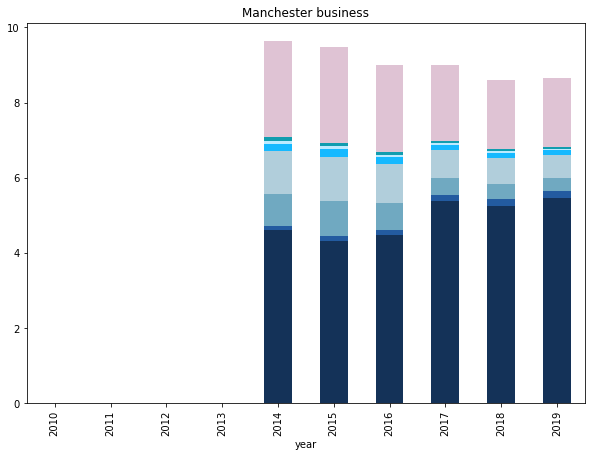

In [37]:
pivot_business = a.pivot(index='year', columns='subcat', values='val')
ax = pivot_business.loc[:,['location', 'communication', 'personality_host2', 'property_type', 'logistic', 'advice', 'facilities', 'interiors']].plot.bar(stacked=True, figsize=(10,7), color=['#143258','#235BA0','#70A9C1','#B1CEDB','#16B9FF','#BCEBFF','#119DAF', '#DFC3D4'])
plt.title("Manchester business")
ax.get_legend().remove()

In [24]:
subcats = ["professional_conduct_host", "location", "property"]
busi = get_trends_nice("business", subcats)

{'professional_conduct_host': 0.36420561789903516, 'location': 0.566116900485664, 'property': 0.6521513521555845}
1.3639377332474265


In [25]:
busi

,year,value,value_business,value_business_professional_conduct_host,value_business_location,value_business_property
0,2010,0.0,0.000000,0.000000,0.000000,0.000000
1,2011,0.0,0.000000,0.000000,0.000000,0.000000
2,2012,0.0,0.000000,0.000000,0.000000,0.000000
3,2013,0.0,0.000000,0.000000,0.000000,0.000000
4,2014,0.0,17.512259,1.891243,4.740262,5.457282
5,2015,0.0,17.536123,2.075974,4.444161,5.586094
6,2016,0.0,17.987175,1.780442,4.616138,5.253184
7,2017,0.0,18.453962,1.256110,5.532170,4.451603
8,2018,0.0,0.000000,0.000000,0.000000,0.000000
9,2019,0.0,0.000000,0.000000,0.000000,0.000000


In [26]:
busi['coef'] = busi['value_business'] / (busi['value_business_professional_conduct_host'] + busi['value_business_location']+busi['value_business_property'])
busi

,year,value,value_business,value_business_professional_conduct_host,value_business_location,value_business_property,coef
0,2010,0.0,0.000000,0.000000,0.000000,0.000000,NaN
1,2011,0.0,0.000000,0.000000,0.000000,0.000000,NaN
2,2012,0.0,0.000000,0.000000,0.000000,0.000000,NaN
3,2013,0.0,0.000000,0.000000,0.000000,0.000000,NaN
4,2014,0.0,17.512259,1.891243,4.740262,5.457282,1.448637
5,2015,0.0,17.536123,2.075974,4.444161,5.586094,1.448521
6,2016,0.0,17.987175,1.780442,4.616138,5.253184,1.543995
7,2017,0.0,18.453962,1.256110,5.532170,4.451603,1.641829
8,2018,0.0,0.000000,0.000000,0.000000,0.000000,NaN
9,2019,0.0,0.000000,0.000000,0.000000,0.000000,NaN


In [27]:
busi['value_business_professional_conduct_host'] = busi['value_business_professional_conduct_host']*busi['coef']
busi['value_business_location'] = busi['value_business_location']*busi['coef']
busi['value_business_property'] = busi['value_business_property']*busi['coef']
busi

,year,value,value_business,value_business_professional_conduct_host,value_business_location,value_business_property,coef
0,2010,0.0,0.000000,NaN,NaN,NaN,NaN
1,2011,0.0,0.000000,NaN,NaN,NaN,NaN
2,2012,0.0,0.000000,NaN,NaN,NaN,NaN
3,2013,0.0,0.000000,NaN,NaN,NaN,NaN
4,2014,0.0,17.512259,2.739724,6.866917,7.905618,1.448637
5,2015,0.0,17.536123,3.007091,6.437459,8.091573,1.448521
6,2016,0.0,17.987175,2.748993,7.127293,8.110889,1.543995
7,2017,0.0,18.453962,2.062318,9.082875,7.308769,1.641829
8,2018,0.0,0.000000,NaN,NaN,NaN,NaN
9,2019,0.0,0.000000,NaN,NaN,NaN,NaN


In [28]:
a = pd.DataFrame(columns=["year", "subcat", "val"])

for subcat in subcats:
    ap = {"year": busi["year"], "val": busi["value_business_{}".format(subcat)]}
    ap = pd.DataFrame(data=ap)
    ap["subcat"] = subcat
    a = a.append(ap)
a

,subcat,val,year
0,professional_conduct_host,NaN,2010
1,professional_conduct_host,NaN,2011
2,professional_conduct_host,NaN,2012
3,professional_conduct_host,NaN,2013
4,professional_conduct_host,2.739724,2014
5,professional_conduct_host,3.007091,2015
6,professional_conduct_host,2.748993,2016
7,professional_conduct_host,2.062318,2017
8,professional_conduct_host,NaN,2018
9,professional_conduct_host,NaN,2019


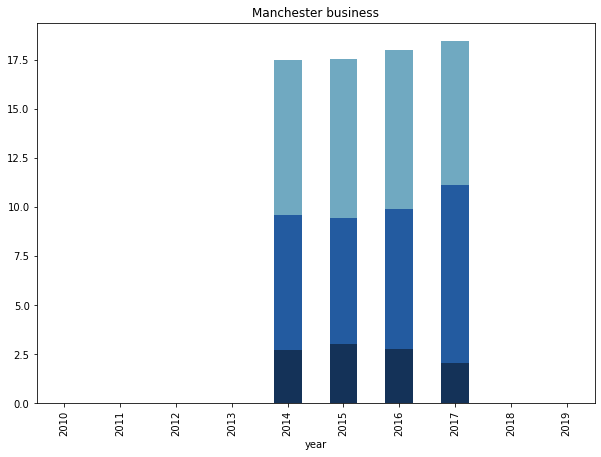

In [29]:
pivot_business = a.pivot(index='year', columns='subcat', values='val')
ax = pivot_business.loc[:, ["professional_conduct_host", "location", "property"]].plot.bar(stacked=True, figsize=(10,7), color=['#143258','#235BA0','#70A9C1'])
plt.title("Manchester business")
ax.get_legend().remove()

In [15]:
dictionary[328:]

,word,cat_lev1,cat_lev2,cat_lev3,ndf
328,delightful,social,social_interaction,personality_host,0.004488
329,relaxed,social,social_interaction,personality_host,0.004332
330,kindness,social,social_interaction,personality_host,0.004247
331,calm,social,social_interaction,personality_host,0.004380
332,polite,social,social_interaction,personality_host,0.003405
333,courteous,social,social_interaction,personality_host,0.002767
334,warmth,social,social_interaction,personality_host,0.001516
335,funny,social,social_interaction,personality_host,0.001396
336,easygoing,social,social_interaction,personality_host,0.000614
337,sympathy,social,social_interaction,personality_host,0.000541


In [16]:
reviews

,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments,langs,den,temp,business,professional_conduct_host,location,property
14,14,68951,10229418,2014-02-08,10652136,Justine,it a lovely house and awesome person you could...,en,9.416378,0.693147,7.361080,0.000000,0.000000,7.361080
15,15,68951,11050942,2014-03-18,9852319,Greg,all very nice clean and easy to check in and o...,en,17.734145,2.079442,11.725638,3.908546,3.908546,3.908546
16,16,68951,14658065,2014-06-23,10195882,Emma,we had a wonderful stay in peter and dellas lo...,en,40.827819,9.010913,22.070523,1.697733,16.977326,3.395465
17,17,68951,15670815,2014-07-14,13078630,David,we had the best experience in this house durin...,en,102.038993,22.703958,22.250276,2.037889,11.945401,8.266986
18,18,68951,17303401,2014-08-10,1669938,Libby,great accommodation warm welcome with a fridge...,en,22.403853,6.931472,30.938748,9.281625,6.187750,15.469374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132232,143614,40944487,583880389,2019-12-29,317007245,Naoki,nice placeclean and tidy close to tram station...,en,13.980727,6.238325,44.620890,0.000000,39.663013,4.957877
132250,143634,40958538,581907582,2019-12-26,284016202,Fisher,pretty nice propertyit provided u a very good ...,en,8.317766,0.693147,8.333333,8.333333,0.000000,0.000000
132251,143635,40958538,583319985,2019-12-28,250172768,Joel,our entire experience with this stay wa unprof...,en,51.294020,8.723231,17.006332,4.053965,4.844437,8.107930
132253,143637,40996300,583843314,2019-12-29,86304424,Rafael,nice owner nice location good value,en,3.871201,0.693147,17.905223,0.000000,17.905223,0.000000


In [17]:
busi

,year,value,value_business_professional_conduct_host,value_business_location,value_business_property
0,2010,0.0,0.000000,0.000000,0.000000
1,2011,0.0,0.000000,0.000000,0.000000
2,2012,0.0,0.000000,0.000000,0.000000
3,2013,0.0,0.000000,0.000000,0.000000
4,2014,0.0,1.891243,4.616377,5.413713
5,2015,0.0,2.075974,4.322458,5.543628
6,2016,0.0,1.780442,4.479176,5.200858
7,2017,0.0,1.256110,5.372430,4.389872
8,2018,0.0,1.224466,5.253883,4.055462
9,2019,0.0,1.104564,5.461111,3.951157
